# **Assignment 1**

# Question 1

In [1]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [2]:
# 5 Movie reviews of the movie "Orphan" taken from IMDb
sample_texts = [
    "Orphan is flawed 2009 psychological horror film that will keep you hooked via its characters and Isabelle Fuhrman's portrayal of Esther. Despite the flaws in storytelling, it still has it moments of fantastic horror.",

    "I enjoyed much of this but there were a few silly moments and I feel if the film had been cut down to 90 minutes we could have got rid of those embarrasing bits and made the whole ting tighter. The acting is fine, especially the two girls and that of Isabelle Fuhrman, who at times seems to be carrying the film, is remarkable. Inevitably, perhaps there are unfortunately those times, as in 'gas lighting' films where we sit frustrated urging those on screen to notice the obvious to no avail and then on we go as everything gets more and more embroiled.",

    "The movie is overall good but the husband in this movie is stupid",

    "You either love it or you hate it. That's really the effect of any great twist. I was one of those who absolutely loved it and found this creepy, disturbing movie even more terrifying with the reveal. Vera Farmiga (Conjuring) stars as a mother whose just gone through a miscarriage and with her husband played by Peter Sarsgaard (Skeleton Key) decides to adopt a mysterious young girl played by a very creepy Isabel Fuhrman (Hunger Games). At first Esther seems a little off but it's mostly acceptable until people begin having horrific accidents and some go missing. There is a palpable sense of dread that builds throughout the film and so many setpieces are expertly executed. The scene in the playground is an especially effective one. The film culminates in a surprising and edge of your seat fashion and all though there's a small loop hole here and there. Its completely successful at being a stylish, unique, intense piece of genre.",

    "Loved the movie, it's just so disturbing and thrilling and suspenseful, the opening scene is very perturbing as the baby covered in blood and the husband taping her as the poor woman miscarriages is disgusting and chills me. Now I really loved Esther and I really clapped in the theater when she dumped the bratty girl down the slide. The fluorescent paint is a good touch. Now people should realize the movie has a whole sexual climax and the movie's theme is about Esther trying to find her sexuality. We find that out on the twist when we realize she was a 35 year old girl with dwarfism and she wanted to find her sexual manners around men who think she is a girl. And I was really disturbed when the men found the fluorescent paintings in the walls with she and him having sex and all of them are dead except for them. The only reason I gave it an 8 was because of the 2 hours with 3 minutes length and had an unnecessary long character development which almost had me sleeping in the movie theater but then I got woken up by the intensity that followed the the boringness."
]

In [3]:
# Initialize tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Analyze each sentence
results = []

for text in sample_texts:
    tokens = word_tokenize(text)
    tokens_no_stop = [w for w in tokens if w.lower() not in stop_words and w.isalpha()]
    stemmed = [stemmer.stem(w) for w in tokens_no_stop]
    lemmatized = [lemmatizer.lemmatize(w) for w in tokens_no_stop]
    pos_tags = pos_tag(tokens_no_stop, lang='eng')

    for i in range(len(tokens_no_stop)):
        word_data = {
            'Original Word': tokens_no_stop[i],
            'Stemmed': stemmed[i],
            'Lemmatized': lemmatized[i],
            'POS Tag': pos_tags[i][1]
        }
        results.append(word_data)

# Convert to DataFrame
df_q1 = pd.DataFrame(results)

df_q1.head(15)

,Original Word,Stemmed,Lemmatized,POS Tag
0,Orphan,orphan,Orphan,NNP
1,flawed,flaw,flawed,VBD
2,psychological,psycholog,psychological,JJ
3,horror,horror,horror,NN
4,film,film,film,NN
5,keep,keep,keep,VB
6,hooked,hook,hooked,JJ
7,via,via,via,IN
8,characters,charact,character,NNS
9,Isabelle,isabel,Isabelle,NNP


# Question 2


In [4]:
# Load the dataset
df = pd.read_csv('Tweets.csv')

# Show basic info
print(df.shape)
df[['airline_sentiment', 'text']].head()

# Take the first 20 tweets
sample_texts = df['text'].head(20).tolist()


(14640, 15)


### Bag of Words (BoW)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer()
bow_features = bow_vectorizer.fit_transform(sample_texts)

print("Bag of Words Shape:", bow_features.shape)


Bag of Words Shape: (20, 178)


### TF-IDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(sample_texts)

print("TF-IDF Shape:", tfidf_features.shape)


TF-IDF Shape: (20, 178)


### Word Embeddings

In [7]:
!pip install gensim

In [8]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Preprocess: lowercase and tokenize
tokenized_texts = [word_tokenize(text.lower()) for text in sample_texts]

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Example embedding
print("Vector for 'flight':", w2v_model.wv['flight'][:10])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Vector for 'flight': [-0.00785452 -0.0066969  -0.00313922  0.00666726 -0.00081069  0.00877277
 -0.00224585 -0.00508009  0.00385905  0.00215545]


### Summary

In [9]:
print("Summary of Vector Shapes:")
print("Bag of Words matrix shape: ", bow_features.shape)
print("TF-IDF matrix shape: ", tfidf_features.shape)
print("Word2Vec vocab size: ", len(w2v_model.wv))


Summary of Vector Shapes:
Bag of Words matrix shape:  (20, 178)
TF-IDF matrix shape:  (20, 178)
Word2Vec vocab size:  205


# Question 3

In [10]:
# Load data
df = pd.read_csv('Tweets.csv')

# Keep only needed columns
df = df[['text', 'airline_sentiment']]

# Use first 50 samples (or use df.sample(50) for random)
df = df.head(50)

In [11]:
# Text Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

# Labels
y = df['airline_sentiment']


In [12]:
# Test-Train Split
from sklearn.model_selection import train_test_split

# Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic Regression


In [13]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


### Naive Bias

In [14]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)


### Evaluation Metrics

In [15]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Logistic Regression Results
print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Naive Bayes Results
print("\n🔹 Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


🔹 Logistic Regression
Accuracy: 0.3
F1 Score: 0.18333333333333332
Confusion Matrix:
 [[0 3 3]
 [0 1 0]
 [0 1 2]]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         6
     neutral       0.20      1.00      0.33         1
    positive       0.40      0.67      0.50         3

    accuracy                           0.30        10
   macro avg       0.20      0.56      0.28        10
weighted avg       0.14      0.30      0.18        10


🔹 Naive Bayes
Accuracy: 0.3
F1 Score: 0.17333333333333334
Confusion Matrix:
 [[0 2 4]
 [0 1 0]
 [0 1 2]]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         6
     neutral       0.25      1.00      0.40         1
    positive       0.33      0.67      0.44         3

    accuracy                           0.30        10
   macro avg       0.19      0.56      0.28        10
weighted avg       0.12      0.30      0.17        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

# Question 4

In [16]:
text = """
The castle stood silent under a heavy veil of fog, its towers piercing the grey sky like spears. Harry walked quietly through the empty corridor, the distant echoes of footsteps making his heart pound faster. He wasn't supposed to be out this late, but something deep inside urged him forward. The shadows danced along the walls, and every flicker of torchlight seemed to whisper secrets he wasn’t meant to hear.

As he reached the base of the Astronomy Tower, he paused. The night was colder than he expected, and his hands trembled not from the chill, but from fear. What if it was a trap? What if Malfoy really had something terrible planned? He took a deep breath, clutching his wand tighter, and began to climb.

At the top, the wind howled and the moon painted silver lines across the floor. But there he was — Malfoy — not with hatred, but tears in his eyes. “I don’t want this anymore,” Malfoy whispered. Harry froze. The boy he once considered an enemy looked broken, fragile. For a moment, the walls between them faded. They stood in silence, sharing the weight of expectations too big for either of them.

Then, from the shadows, a voice rang out — cold, clear, final. “Expelliarmus!” Harry turned just in time to see Snape step forward. The world collapsed into chaos. Wands clashed, sparks flew, and everything Harry thought he understood came undone. As the smoke cleared and silence returned, Harry stood alone, the storm outside now echoing the one within him.
"""


In [17]:
# Splitting
segments = text.strip().split('\n')
segments = [seg.strip() for seg in segments if seg.strip() != '']
print("Segments:", segments)


Segments: ["The castle stood silent under a heavy veil of fog, its towers piercing the grey sky like spears. Harry walked quietly through the empty corridor, the distant echoes of footsteps making his heart pound faster. He wasn't supposed to be out this late, but something deep inside urged him forward. The shadows danced along the walls, and every flicker of torchlight seemed to whisper secrets he wasn’t meant to hear.", 'As he reached the base of the Astronomy Tower, he paused. The night was colder than he expected, and his hands trembled not from the chill, but from fear. What if it was a trap? What if Malfoy really had something terrible planned? He took a deep breath, clutching his wand tighter, and began to climb.', 'At the top, the wind howled and the moon painted silver lines across the floor. But there he was — Malfoy — not with hatred, but tears in his eyes. “I don’t want this anymore,” Malfoy whispered. Harry froze. The boy he once considered an enemy looked broken, fragile

### VADER

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

# Compute sentiment for each segment
sentiment_scores = [sid.polarity_scores(seg)['compound'] for seg in segments]
print(sentiment_scores)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


[0.1154, -0.9261, -0.2842, -0.6239]


### Sentiment Trajectory

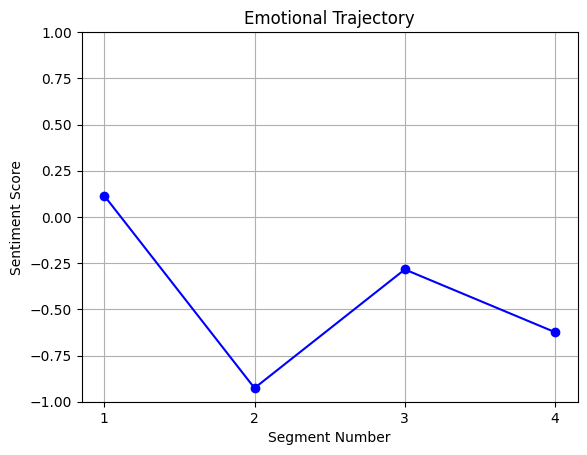

In [19]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(sentiment_scores)+1), sentiment_scores, marker='o', linestyle='-', color='blue')
plt.title('Emotional Trajectory')
plt.xlabel('Segment Number')
plt.ylabel('Sentiment Score')
plt.ylim(-1, 1)
plt.grid(True)
plt.xticks(range(1, len(sentiment_scores)+1))
plt.show()
